In [44]:
#question 1
import pandas as pd

In [67]:
df = pd.read_csv("/content/spam.csv", encoding='latin1')[['v1','v2']]

In [68]:
df.columns = ['label', 'text']

In [69]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [70]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [71]:
X = df['text'].str.lower()
y = df['label']

In [72]:
import string
import re
X = X.str.replace(f'[{re.escape(string.punctuation)}]', '', regex=True)

In [73]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stop_words])

X = X.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [74]:
X

,text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though
...,...
5567,2nd time tried 2 contact u u å£750 pound prize...
5568,ì b going esplanade fr home
5569,pity mood soany suggestions
5570,guy bitching acted like id interested buying s...


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [79]:
print(y.value_counts())
print(y.value_counts(normalize=True))

label
0    4825
1     747
Name: count, dtype: int64
label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
c = DecisionTreeClassifier(max_depth = 1)

In [82]:
c.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [83]:
y_predict = c.predict(x_test)

In [84]:
from sklearn import metrics

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.8896860986547085


In [86]:
y_train_predict = c.predict(x_train)
print("Training Accuracy:", metrics.accuracy_score(y_train, y_train_predict))

Training Accuracy: 0.8891631142023783


In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
print(confusion_matrix(y_test, y_predict))

[[965   0]
 [123  27]]


In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
n_estimators=100,
learning_rate=0.6
)

In [91]:
a.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=100)

In [92]:
y_pred = a.predict(x_test)

In [93]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [94]:
print(accuracy)

0.9022421524663677


In [95]:
y_train_pred = a.predict(x_train)

In [96]:
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)

In [97]:
accuracy_train

0.90442001346197

In [98]:
import numpy as np
n_samples = x_train.shape[0]
sample_weights = np.full(n_samples, 1 / n_samples)
n_estimators = 10
weak_learners = []
alphas = []
errors = []
for i in range(n_estimators):
  weak = DecisionTreeClassifier(max_depth = 1, random_state = 42)
  weak.fit(x_train, y_train, sample_weight = sample_weights)
  y_pred = weak.predict(x_train)
  misclassified = (y_pred != y_train)
  misclassified_indices = np.where(misclassified)[0]
  error_rate = np.sum(sample_weights[misclassified_indices])
  print(f"Iteration {i+1}: Error Rate = {error_rate:.4f}")
  errors.append(error_rate)
  if error_rate <= 0:
        alpha = 1e6
  elif error_rate >= 0.5:
        alpha = -1e-6
  else:
        alpha = 0.5 * np.log((1.0 - error_rate) / error_rate)
  print(f"Iteration {i+1}: Alpha = {alpha:.4f}")
  sample_weights[misclassified] *= np.exp(alpha)
  sample_weights[~misclassified] *= np.exp(-alpha)
  sample_weights /= np.sum(sample_weights)
  weak_learners.append(weak)
  alphas.append(alpha)

Iteration 1: Error Rate = 0.1108
Iteration 1: Alpha = 1.0411
Iteration 2: Error Rate = 0.4096
Iteration 2: Alpha = 0.1828
Iteration 3: Error Rate = 0.4236
Iteration 3: Alpha = 0.1540
Iteration 4: Error Rate = 0.4172
Iteration 4: Alpha = 0.1672
Iteration 5: Error Rate = 0.4289
Iteration 5: Alpha = 0.1431
Iteration 6: Error Rate = 0.4300
Iteration 6: Alpha = 0.1409
Iteration 7: Error Rate = 0.4391
Iteration 7: Alpha = 0.1224
Iteration 8: Error Rate = 0.4384
Iteration 8: Alpha = 0.1238
Iteration 9: Error Rate = 0.4452
Iteration 9: Alpha = 0.1101
Iteration 10: Error Rate = 0.4370
Iteration 10: Alpha = 0.1267


In [99]:
import matplotlib.pyplot as plt

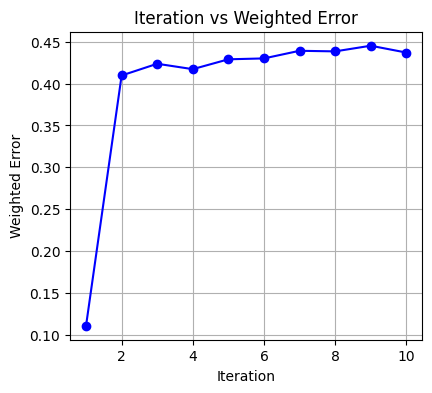

In [100]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_estimators + 1), errors, marker='o', color='blue')
plt.title('Iteration vs Weighted Error')
plt.xlabel('Iteration')
plt.ylabel('Weighted Error')
plt.grid(True)

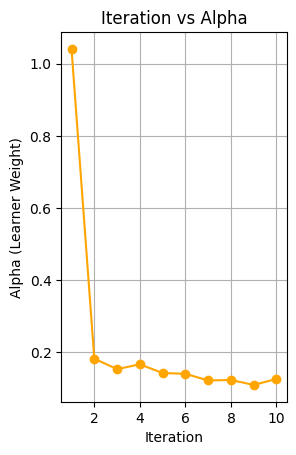

In [101]:
plt.subplot(1, 2, 2)
plt.plot(range(1, n_estimators + 1), alphas, marker='o', color='orange')
plt.title('Iteration vs Alpha')
plt.xlabel('Iteration')
plt.ylabel('Alpha (Learner Weight)')
plt.grid(True)

In [102]:
def adaboost_predict(X):
  final_pred = np.zeros(X.shape[0])
  for i in range(n_estimators):
    y_pred = weak_learners[i].predict(X)
    final_pred =+ alphas[i] * y_pred
  return np.sign(final_pred)

In [103]:
y_train_pred = adaboost_predict(x_train)

In [104]:
train_acc = metrics.accuracy_score(y_train,y_train_pred)

In [105]:
train_acc

0.8754767781018622

In [106]:
y_test_pred = adaboost_predict(x_test)

In [107]:
test_acc = metrics.accuracy_score(y_test,y_test_pred)

In [108]:
test_acc

0.8753363228699551

In [109]:
cm = confusion_matrix(y_test, y_test_pred)

In [110]:
cm

array([[958,   7],
       [132,  18]])

In [ ]:
#question 2

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [ ]:
df = fetch_openml('mnist_784', version=1, as_frame=False)

In [ ]:
df

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [ ]:
import numpy as np

In [ ]:
if set(np.unique(y)) - {0, 1}:
    try:
        y_num = pd.to_numeric(y)
        y = (y_num > 0).astype(int)
        print("mapped multi-valued target to binary (0 = no disease, 1 = disease).")
    except Exception:
        mode = pd.Series(y).mode().iloc[0]
        y = (y != mode).astype(int)
        print("fallback mapping of target to binary.")

In [ ]:
X = df.data
y = df.target

In [38]:
y = y_num
print(y)

[5 0 4 ... 4 5 6]


In [40]:
X = X / 255
print(X[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (56000, 784)
x_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [48]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier(max_depth=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [49]:
from sklearn import metrics

In [50]:
y_predict = decision.predict(x_test)

In [53]:
print(metrics.accuracy_score(y_test, y_predict))

0.20635714285714285


In [54]:
y_train_predict = decision.predict(x_train)

In [55]:
print(metrics.accuracy_score(y_train, y_train_predict))

0.19683928571428572


In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
print(cm)

[[   0  102    0    0    0    0    0 1241    0    0]
 [   0 1487    0    0    0    0    0  113    0    0]
 [   0  286    0    0    0    0    0 1094    0    0]
 [   0 1132    0    0    0    0    0  301    0    0]
 [   0  117    0    0    0    0    0 1178    0    0]
 [   0  532    0    0    0    0    0  741    0    0]
 [   0  268    0    0    0    0    0 1128    0    0]
 [   0  101    0    0    0    0    0 1402    0    0]
 [   0  683    0    0    0    0    0  674    0    0]
 [   0  295    0    0    0    0    0 1125    0    0]]


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.30      0.93      0.45      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.16      0.93      0.27      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.21     14000
   macro avg       0.05      0.19      0.07     14000
weighted avg       0.05      0.21      0.08     14000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
n_estimators_values = [50, 100, 150]
learning_rate_values = [0.01, 0.1, 1.0]
print("n_estimators_values:", n_estimators_values)
print("learning_rate_values:", learning_rate_values)

n_estimators_values: [50, 100, 150]
learning_rate_values: [0.01, 0.1, 1.0]


In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

results = []

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        ada_clf = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=42
        )
        ada_clf.fit(x_train, y_train)
        y_pred = ada_clf.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        results.append({
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'accuracy': accuracy
        })
        print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, Accuracy: {accuracy:.4f}")
for res in results:
    print(res)

n_estimators: 50, learning_rate: 0.01, Accuracy: 0.2030
n_estimators: 50, learning_rate: 0.1, Accuracy: 0.3598
n_estimators: 50, learning_rate: 1.0, Accuracy: 0.6426
n_estimators: 100, learning_rate: 0.01, Accuracy: 0.2275
n_estimators: 100, learning_rate: 0.1, Accuracy: 0.5517
n_estimators: 100, learning_rate: 1.0, Accuracy: 0.7174
n_estimators: 150, learning_rate: 0.01, Accuracy: 0.2275
n_estimators: 150, learning_rate: 0.1, Accuracy: 0.5951
n_estimators: 150, learning_rate: 1.0, Accuracy: 0.7447
{'n_estimators': 50, 'learning_rate': 0.01, 'accuracy': 0.203}
{'n_estimators': 50, 'learning_rate': 0.1, 'accuracy': 0.35978571428571426}
{'n_estimators': 50, 'learning_rate': 1.0, 'accuracy': 0.6425714285714286}
{'n_estimators': 100, 'learning_rate': 0.01, 'accuracy': 0.2275}
{'n_estimators': 100, 'learning_rate': 0.1, 'accuracy': 0.5517142857142857}
{'n_estimators': 100, 'learning_rate': 1.0, 'accuracy': 0.7173571428571428}
{'n_estimators': 150, 'learning_rate': 0.01, 'accuracy': 0.2275}


In [61]:
results_df = pd.DataFrame(results)
print(results_df.head())

   n_estimators  learning_rate  accuracy
0            50           0.01  0.203000
1            50           0.10  0.359786
2            50           1.00  0.642571
3           100           0.01  0.227500
4           100           0.10  0.551714


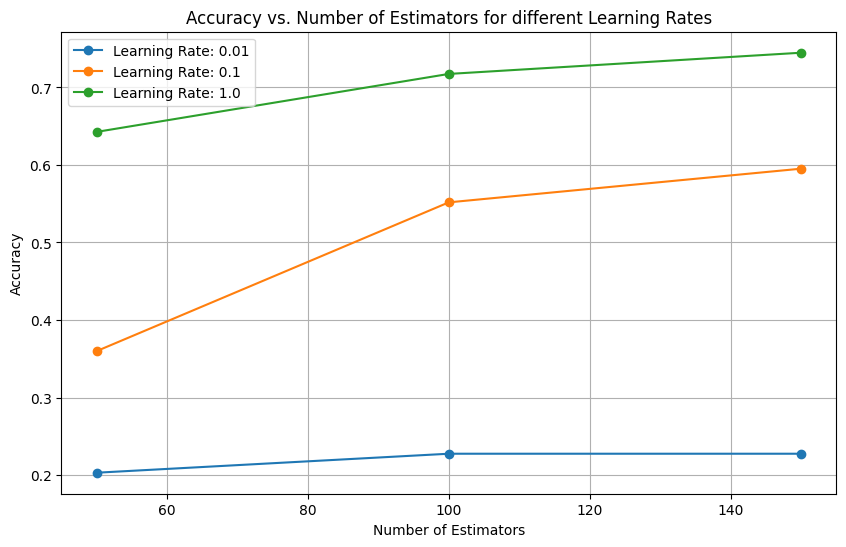

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for lr in results_df['learning_rate'].unique():
    subset = results_df[results_df['learning_rate'] == lr]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'Learning Rate: {lr}')

plt.title('Accuracy vs. Number of Estimators for different Learning Rates')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
y_train_binary = (y_train == '0').astype(int) if y_train.dtype == 'object' else (y_train == 0).astype(int)
y_test_binary = (y_test == '0').astype(int) if y_test.dtype == 'object' else (y_test == 0).astype(int)
n_samples = x_train.shape[0]
sample_weights = np.full(n_samples, 1 / n_samples)
n_estimators = 100
weak_learners = []
alphas = []
errors = []
for i in range(n_estimators):
  weak = DecisionTreeClassifier(max_depth=1, random_state=42)
  weak.fit(x_train, y_train_binary, sample_weight=sample_weights)
  y_pred = weak.predict(x_train)
  misclassified = (y_pred != y_train_binary)
  misclassified_indices = np.where(misclassified)[0]
  error_rate = np.sum(sample_weights[misclassified_indices])
  errors.append(error_rate)
  if error_rate <= 0:
    alpha = 1e6
  elif error_rate >= 0.5:
    alpha = -1e-6
  else:
    alpha = 0.5 * np.log((1.0 - error_rate) / error_rate)
  alphas.append(alpha)
  sample_weights[misclassified] *= np.exp(alpha)
  sample_weights[~misclassified] *= np.exp(-alpha)
  sample_weights /= np.sum(sample_weights)
  weak_learners.append(weak)
print(f"Number of weak learners: {len(weak_learners)}")
print(f"Number of alphas: {len(alphas)}")
print(f"Number of errors: {len(errors)}")
print(f"Sum of final sample weights: {np.sum(sample_weights):.4f}")

Number of weak learners: 100
Number of alphas: 100
Number of errors: 100
Sum of final sample weights: 1.0000


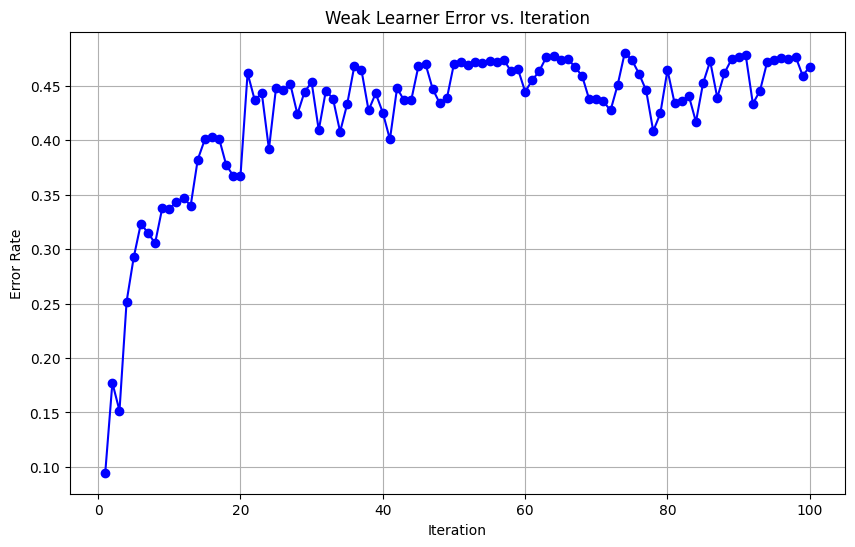

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_estimators + 1), errors, marker='o', color='blue')
plt.title('Weak Learner Error vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

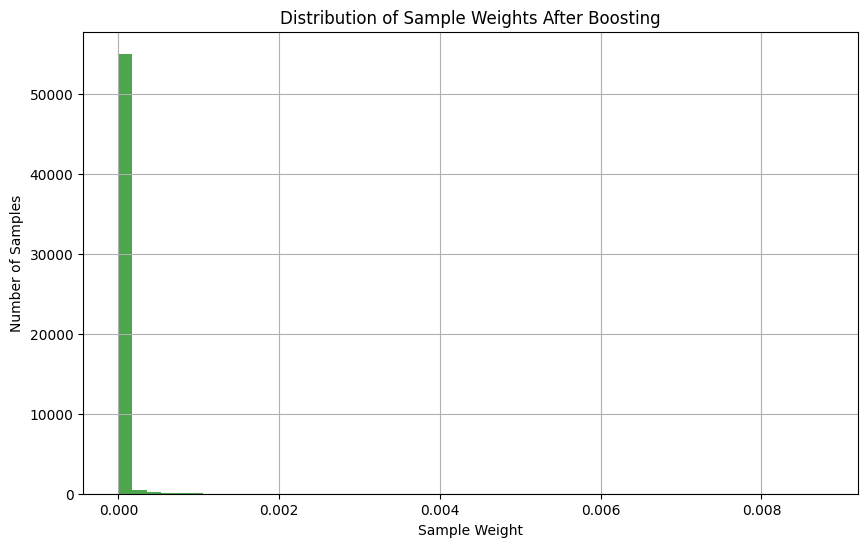

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(sample_weights, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Sample Weights After Boosting')
plt.xlabel('Sample Weight')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()